In [6]:
import pandas as pd
# dataset = pd.read_csv('kerala.csv')
# dataset = dataset.replace({'FLOODS': {'YES': 1, 'NO': 0}})

In [ ]:
# x = dataset.drop(columns=["FLOODS","SUBDIVISION"]) #input

In [ ]:
# y = dataset["FLOODS"] #output

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# x1 = dataset.drop(columns=["SUBDIVISION","FLOODS","YEAR"])
# y1 = dataset["YEAR"]
# plt.plot(y1, x1, '.')
# plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# import tensorflow as tf
# model = tf.keras.models.Sequential()

In [ ]:
# model.add(tf.keras.layers.Dense(256, input_shape=x_train.shape[1:], activation='sigmoid'))
# model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(x_train, y_train, epochs=1000)

In [ ]:
# model.evaluate(x_test, y_test)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
%matplotlib inline
data1 = pd.read_csv('us_tornado_dataset_1950_2021.csv')
data1 = data1.drop(columns=["yr","mo","dy","date"])
x3 = data1.drop(columns=["st"])
y3 = data1["st"]
data1.head()
#linear regression


,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


<ipython-input-8-5faab5a918a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr())


<Axes: >

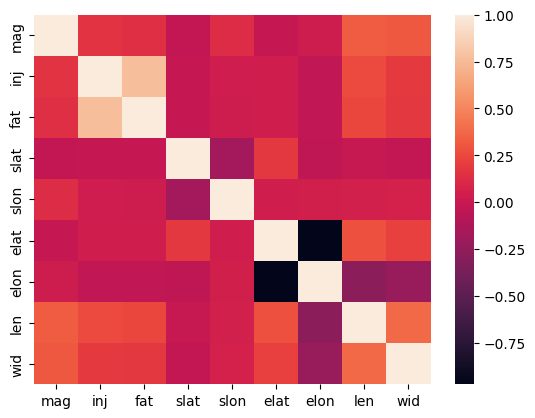

In [8]:
sns.heatmap(data1.corr())

In [9]:
# plt.scatter(x3,y3,color='blue',marker='*')
from sklearn import linear_model
data1le = data1
data1le.st = le.fit_transform(data1le.st)
X = data1le[["wid","len","elon","elat","slon","slat","fat","inj","mag"]]
Y = data1le["st"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg.coef_
reg.intercept_
# reg.predict([[42,43,10]])
reg.score(x_test,y_test)

0.028931186264789632

In [10]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(data1,f)

In [11]:
with open('model_pickle','rb') as f:
  mp=pickle.load(f)

In [12]:
from sklearn import externals
import joblib

In [13]:
joblib.dump(data1,'model_joblib')
mj = joblib.load('model_joblib')
# mj.predict([[42,43,10]])

In [14]:
from sklearn.linear_model import LogisticRegression
md = LogisticRegression()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3,y3,test_size=0.2)
md.fit(x_train, y_train)
# md.predict([[42,43,10]])
md.score(x_test,y_test)
# md.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.26716992303137954

Text(50.722222222222214, 0.5, 'Truth')

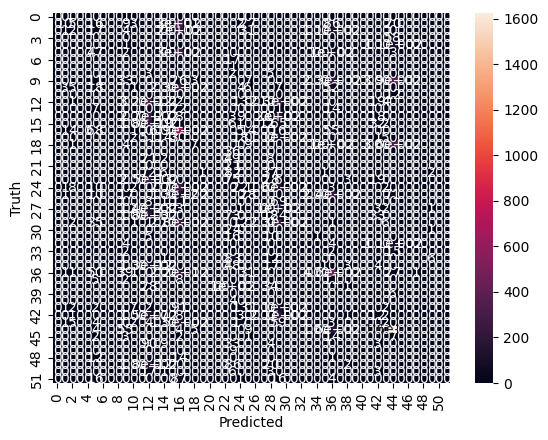

In [15]:
y_predicted = md.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# mp.predict([[42,43,10]])

In [16]:
from sklearn import tree
md = tree.DecisionTreeClassifier()
md.fit(x_train,y_train)
md.score(x_test,y_test)
# md.predict([[42,43,10]])

0.9841622261693309

In [17]:
# from sklearn.svm import SVC
# sv = SVC(C=10, kernel='linear') #C=> regularization = distance
# sv.fit(x_train,y_train)
# sv.score(x_test,y_test)

Text(50.722222222222214, 0.5, 'Truth')

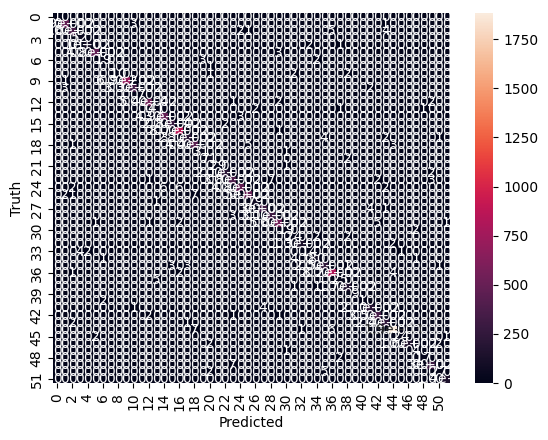

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=60)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3,y3,test_size=0.2)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)
y_predicted2 = rfc.predict(x_test)
cm2 = confusion_matrix(y_test, y_predicted2)
cm2
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [20]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index, test_index )

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [21]:
def get_score(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  return model.score(x_test,y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
score_l = []
score_sv = []
score_rf = []
from sklearn.svm import SVC
for train_index, test_index in kf.split(x3):
  x1_train,x1_test,y1_train,y1_test = x3.values[train_index], x3.values[test_index], y3.values[train_index], y3.values[test_index]
  score_sv.append(get_score(SVC(),x1_train,x1_test,y1_train,y1_test ))
  score_l.append(get_score(LogisticRegression(),x1_train,x1_test,y1_train,y1_test ))
  score_rf.append(get_score(RandomForestClassifier(n_estimators=40),x1_train,x1_test,y1_train,y1_test ))

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),x3,y3)

array([1.        , 1.        , 1.        , 1.        , 0.85714286])

In [ ]:
cross_val_score(SVC(),x3,y3)

array([1.        , 1.        , 1.        , 1.        , 0.85714286])

In [ ]:
cross_val_score(RandomForestClassifier(),x3,y3)

array([1.   , 0.875, 1.   , 1.   , 1.   ])

In [ ]:
# plt.scatter(x3,y3)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [ ]:
# y_predict = km.fit_predict([x3,y3])
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'),
                   {
                      'C':[10,20,1],
                      'kernel':['rbf','linear']
                   }, cv=5, return_train_score=False)
clf.fit(x3,y3)
clf.cv_results_

{'mean_fit_time': array([0.00253196, 0.00146542, 0.00171366, 0.00165009, 0.00182085,
        0.00160975]),
 'std_fit_time': array([1.24158671e-03, 2.97947302e-05, 1.92313137e-04, 1.18461361e-04,
        2.07418431e-04, 6.65069727e-05]),
 'mean_score_time': array([0.00149727, 0.00119691, 0.00157251, 0.00118155, 0.00160575,
        0.00133705]),
 'std_score_time': array([3.59336427e-04, 6.82276162e-05, 3.81942772e-04, 2.37258952e-05,
        6.42768654e-04, 1.72890988e-04]),
 'param_C': masked_array(data=[10, 10, 20, 20, 1, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'},
  {'C': 1, 'ke

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002532,0.001242,0.001497,0.000359,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.5,0.5,0.5,0.5,0.428571,0.485714,0.028571,4
1,0.001465,0.000030,0.001197,0.000068,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,0.857143,0.971429,0.057143,1
2,0.001714,0.000192,0.001573,0.000382,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.5,0.5,0.5,0.5,0.428571,0.485714,0.028571,4
3,0.001650,0.000118,0.001182,0.000024,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,0.857143,0.971429,0.057143,1
4,0.001821,0.000207,0.001606,0.000643,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.5,0.5,0.5,0.5,0.428571,0.485714,0.028571,4
5,0.001610,0.000067,0.001337,0.000173,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,0.857143,0.971429,0.057143,1


In [ ]:
clf.best_score_

0.9714285714285713

In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rlf = RandomizedSearchCV(SVC(gamma='auto'),
                   {
                      'C':[10,20,1],
                      'kernel':['rbf','linear']
                   }, cv=5, return_train_score=False, n_iter=3)
rlf.fit(x3,y3)
rlf.cv_results_
rlf.best_score_

0.9714285714285713

In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x3, y3)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.971429,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.950000,{'n_estimators': 10}
2,logistic_regression,0.942857,{'C': 5}
